In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
# Define the dataset path
dataset_path = '/content/drive/MyDrive/Datasets /underwater_plastics'

In [ ]:
# Install YOLOv8 and necessary libraries
!pip install ultralytics opencv-python-headless matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 24.2 MB/s eta 0:00:00


In [ ]:
import os

# Verify and display dataset structure
for folder in ['train', 'valid', 'test']:
    print(f"{folder.capitalize()} Directory:")
    images = os.listdir(os.path.join(dataset_path, folder, 'images'))
    labels = os.listdir(os.path.join(dataset_path, folder, 'labels'))
    print(f"  Number of images: {len(images)}")
    print(f"  Number of labels: {len(labels)}")



Train Directory:
  Number of images: 3628
  Number of labels: 3628
Valid Directory:
  Number of images: 1001
  Number of labels: 1007
Test Directory:
  Number of images: 501
  Number of labels: 501


In [ ]:
import os

# Define the base directory
base_dir = 'underwater_plastics'

# Define expected folder paths
expected_folders = [
    os.path.join(base_dir, 'train/images'),
    os.path.join(base_dir, 'train/labels'),
    os.path.join(base_dir, 'valid/images'),
    os.path.join(base_dir, 'valid/labels'),
    os.path.join(base_dir, 'test/images'),
    os.path.join(base_dir, 'test/labels')
]

# Check if folders exist
for folder in expected_folders:
    if not os.path.exists(folder):
        print(f"Missing folder: {folder}")
    else:
        print(f"Found folder: {folder}")


Missing folder: underwater_plastics/train/images
Missing folder: underwater_plastics/train/labels
Missing folder: underwater_plastics/valid/images
Missing folder: underwater_plastics/valid/labels
Missing folder: underwater_plastics/test/images
Missing folder: underwater_plastics/test/labels


In [ ]:
import os

# Update base_dir to the correct path in Google Drive
base_dir = '/content/drive/MyDrive/Datasets /underwater_plastics'

# Function to check file consistency
def check_file_consistency(images_folder, labels_folder):
    images = set(f.split('.')[0] for f in os.listdir(images_folder) if f.endswith('.jpg'))
    labels = set(f.split('.')[0] for f in os.listdir(labels_folder) if f.endswith('.txt'))

    # Find mismatched files
    missing_labels = images - labels
    missing_images = labels - images

    if missing_labels:
        print(f"Missing label files for: {missing_labels}")
    if missing_images:
        print(f"Missing image files for: {missing_images}")
    if not missing_labels and not missing_images:
        print("All images and labels are correctly matched!")

# Check consistency in each dataset split
for split in ['train', 'valid', 'test']:
    print(f"Checking {split} dataset...")
    images_folder = os.path.join(base_dir, f'{split}/images')  # Use updated base_dir
    labels_folder = os.path.join(base_dir, f'{split}/labels')  # Use updated base_dir
    check_file_consistency(images_folder, labels_folder)

Checking train dataset...
All images and labels are correctly matched!
Checking valid dataset...
Missing image files for: {'gloves_in_the_ocean2_jpg', 'uwg_g-1273_jpg', 'mask_in_the_ocean_39_jpg', 'uwg_g-151_jpg', 'uwg_g-838__flipv_jpg', 'uwg_g-1293_jpg'}
Checking test dataset...
All images and labels are correctly matched!


In [ ]:
import os

# Update base_dir to the correct path in Google Drive
base_dir = '/content/drive/MyDrive/Datasets /underwater_plastics'

# Function to check file consistency
def check_file_consistency(images_folder, labels_folder):
    images = set(f.split('.')[0] for f in os.listdir(images_folder) if f.endswith('.jpg'))
    labels = set(f.split('.')[0] for f in os.listdir(labels_folder) if f.endswith('.txt'))

    # Find mismatched files
    missing_labels = images - labels
    missing_images = labels - images

    if missing_labels:
        print(f"Missing label files for: {missing_labels}")
    if missing_images:
        print(f"Missing image files for: {missing_images}")
    if not missing_labels and not missing_images:
        print("All images and labels are correctly matched!")

def count_files(folder_path):
    """Counts the number of files in a given folder."""
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

def check_dataset_structure(base_dir):
    splits = ['train', 'valid', 'test']
    for split in splits:
        print(f"\nChecking {split} dataset...")

        # Check folder existence
        images_folder = os.path.join(base_dir, f'{split}/images')
        labels_folder = os.path.join(base_dir, f'{split}/labels')
        if not os.path.exists(images_folder) or not os.path.exists(labels_folder):
            print(f"Missing required folders for {split} dataset!")
            continue

        # Check file consistency
        check_file_consistency(images_folder, labels_folder)

        # Count files
        images_count = count_files(images_folder)
        labels_count = count_files(labels_folder)
        print(f"{split.capitalize()} - Images: {images_count}, Labels: {labels_count}")

# Run the full dataset structure check
check_dataset_structure(base_dir)


Checking train dataset...
All images and labels are correctly matched!
Train - Images: 3628, Labels: 3628

Checking valid dataset...
Missing image files for: {'gloves_in_the_ocean2_jpg', 'uwg_g-1273_jpg', 'mask_in_the_ocean_39_jpg', 'uwg_g-151_jpg', 'uwg_g-838__flipv_jpg', 'uwg_g-1293_jpg'}
Valid - Images: 1001, Labels: 1007

Checking test dataset...
All images and labels are correctly matched!
Test - Images: 501, Labels: 501


In [ ]:
data_yaml = f"""
path: {dataset_path}  # Base directory for the dataset
train: train/images  # Path to training images
val: valid/images    # Path to validation images

# Define number of classes and their names
nc: 15
names: ['Mask', 'can', 'cellphone', 'electronics', 'gbottle', 'glove', 'metal',
        'misc', 'net', 'pbag', 'pbottle', 'plastic', 'rod', 'sunglasses', 'tire']
"""

# Save the data.yaml file
with open(f"{dataset_path}/data.yaml", "w") as file:
    file.write(data_yaml)


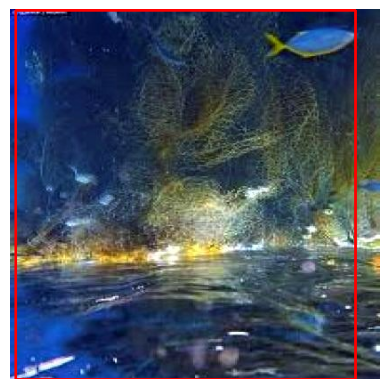

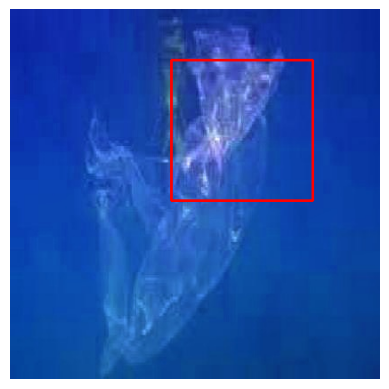

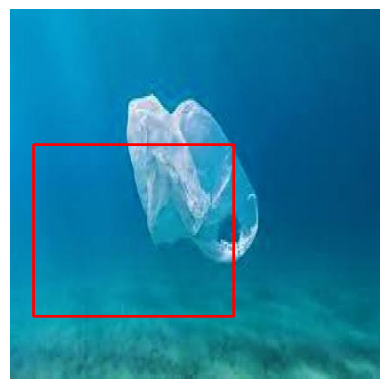

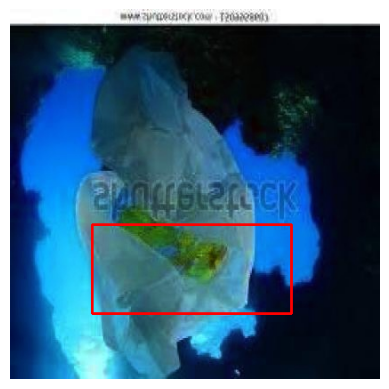

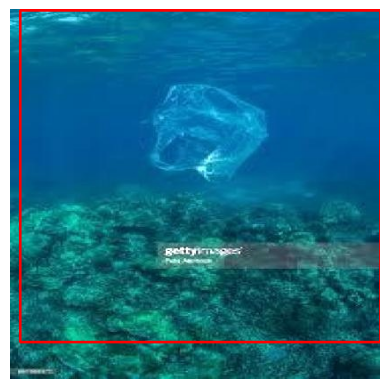

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to display images with bounding boxes
def plot_image_with_bboxes(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with open(label_path, 'r') as f:
        bboxes = f.readlines()

    h, w, _ = img.shape
    for bbox in bboxes:
        cls, x, y, bw, bh = map(float, bbox.split())
        x_min = int((x - bw / 2) * w)
        y_min = int((y - bh / 2) * h)
        x_max = int((x + bw / 2) * w)
        y_max = int((y + bh / 2) * h)
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Visualize a few training images
train_images = os.listdir(os.path.join(dataset_path, 'train/images'))
train_labels = os.listdir(os.path.join(dataset_path, 'train/labels'))

for img_name, lbl_name in zip(train_images[:5], train_labels[:5]):
    img_path = os.path.join(dataset_path, 'train/images', img_name)
    lbl_path = os.path.join(dataset_path, 'train/labels', lbl_name)
    plot_image_with_bboxes(img_path, lbl_path)


In [ ]:
from ultralytics import YOLO

# Initialize YOLOv8 model
model = YOLO('yolov8s.yaml')  # Use YOLOv8s for object detection

# Train the model
model.train(
    data=f'{dataset_path}/data.yaml',  # Dataset configuration
    epochs=10,                         # Number of epochs
    imgsz=640,                         # Image size
    batch=5,                          # Batch size
    name='underwater_yolov8',          # Name of the training run
    workers=4                          # Number of data loader workers
)


Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Datasets /underwater_plastics/data.yaml, epochs=10, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=underwater_yolov83, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ed6927ae9e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1568, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ed6927ae9e0>
Traceback (most recent call last):
  File "/usr

RuntimeError: DataLoader worker (pid 17301) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.

In [ ]:
# Validate the trained model
metrics = model.val()
print(metrics)


Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/Datasets /underwater_plastics/valid/labels.cache... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 201/201 [00:23<00:00,  8.45it/s]


                   all       1001       1891      0.568      0.139      0.141     0.0809
                  Mask         77         90          0          0     0.0161    0.00699
                   can         18         20          1          0     0.0131    0.00497
             cellphone         61         71       0.47      0.634      0.565      0.354
           electronics         27         40          1          0     0.0111    0.00696
               gbottle         36         82      0.366       0.11      0.123      0.042
                 glove         37         55          0          0     0.0276     0.0128
                 metal         10         22          1          0          0          0
                  misc         48         51          1          0     0.0151    0.00635
                   net        146        148      0.392      0.419       0.36      0.185
                  pbag        290        330      0.611       0.67      0.664      0.464
               pbottl


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-1014__flipv_jpg.rf.f4acf7bf1caf8711c026c054e5e2f4fc.jpg: 640x640 (no detections), 16.3ms
Speed: 3.2ms preprocess, 16.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


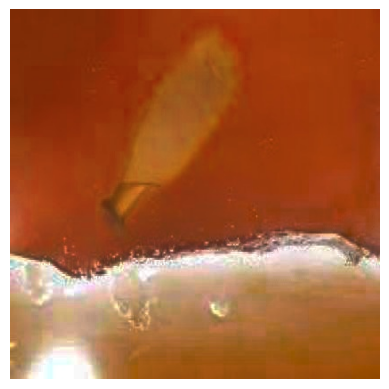


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/mask-pollution-ocean_jpg.rf.789be2881dbc2a02b3392302db52cd52.jpg: 640x640 (no detections), 16.8ms
Speed: 3.4ms preprocess, 16.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


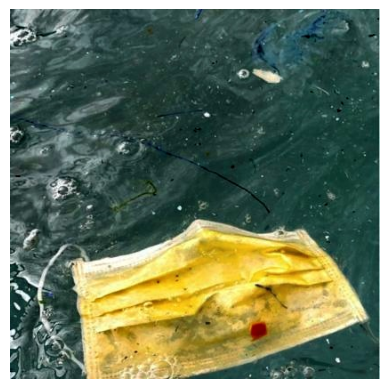


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/mask_in_the_ocean4_jpg.rf.ea9acb02a011bb754697da91e9d2ba1a.jpg: 640x640 1 pbag, 16.4ms
Speed: 3.5ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


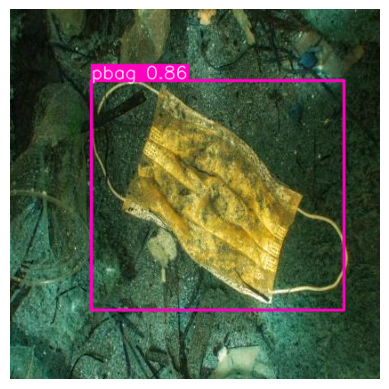


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-16__fliph_jpg.rf.21b6d3b3ac521c539408d8641befb10b.jpg: 640x640 (no detections), 18.1ms
Speed: 4.4ms preprocess, 18.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


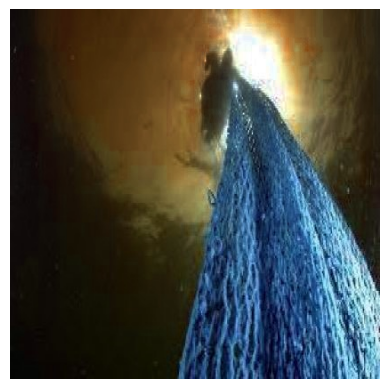


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/c55a7387-91d2-4af5-af92-8f7c10477620-c0abfae8-4dcf-4ba9-b28a-da9e77b296fb_thumbnail_png_jpg.rf.f3e7d71e709aa004093b9e3d43a19971.jpg: 640x640 1 pbag, 16.4ms
Speed: 15.8ms preprocess, 16.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


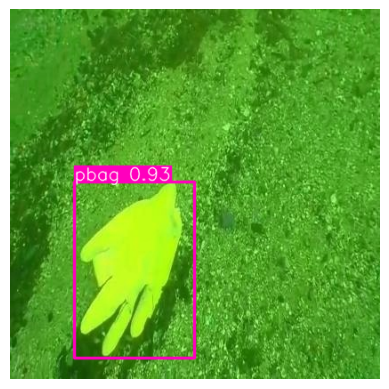


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/indl-ex_jpeg_jpg.rf.0f081bf9a06f0fa868a6cc09f7e60295.jpg: 640x640 1 pbag, 47.4ms
Speed: 12.7ms preprocess, 47.4ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 640)


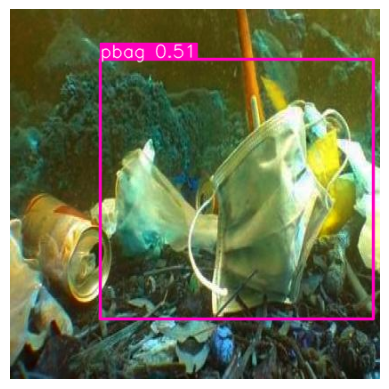


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/mask_in_the_ocean23_jpg.rf.62d5c8f0966eedeb91875c95f9fafd51.jpg: 640x640 1 pbag, 16.8ms
Speed: 3.2ms preprocess, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


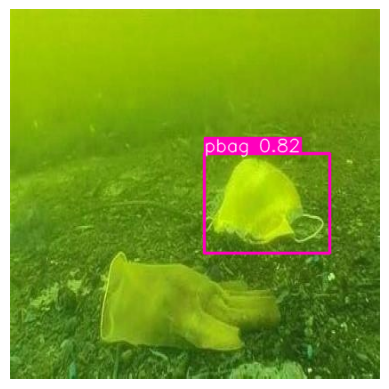


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-1042_jpg.rf.ab1b79a8e9879d0bdc68e4c1d6f8fb12.jpg: 640x640 1 pbag, 16.4ms
Speed: 3.9ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


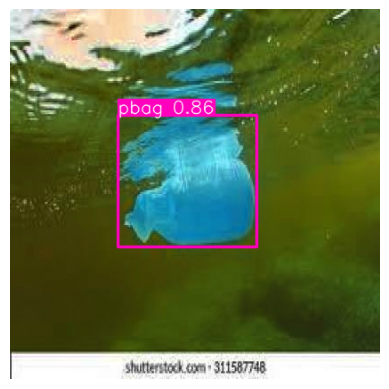


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-1339__flipv_jpg.rf.6c2a412d19d585d30f53866d417df213.jpg: 640x640 (no detections), 16.4ms
Speed: 3.3ms preprocess, 16.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


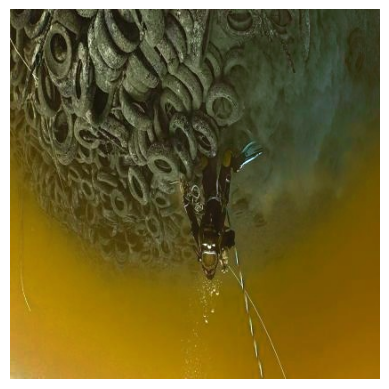


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-377__flipv_jpg.rf.4936a99a9989c6ceeb4f09b03c9e3008.jpg: 640x640 1 cellphone, 16.4ms
Speed: 5.0ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


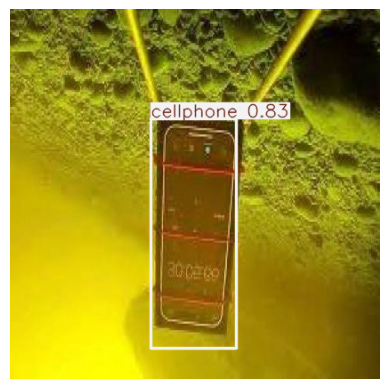


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-1222__flipv_jpg.rf.01334eed9563650a60dc2c64b0b6b66e.jpg: 640x640 (no detections), 16.4ms
Speed: 4.4ms preprocess, 16.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


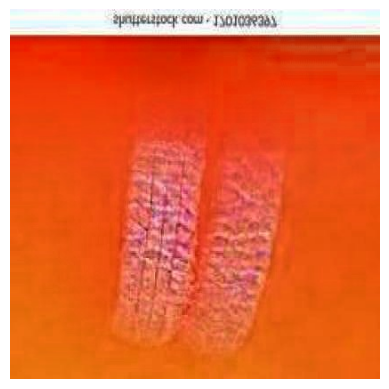


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-338__fliph_jpeg_jpg.rf.59775f361afdff26087744512cfc7251.jpg: 640x640 (no detections), 19.3ms
Speed: 3.9ms preprocess, 19.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


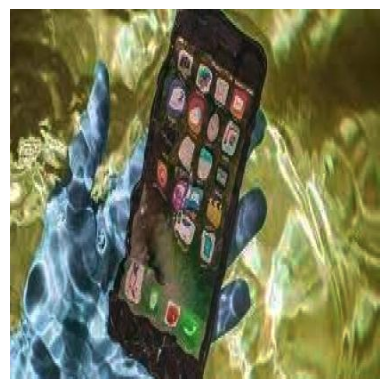


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-1335_jpg.rf.5e9e06ef427439286a1d3817c764dc1e.jpg: 640x640 1 tire, 16.4ms
Speed: 3.9ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


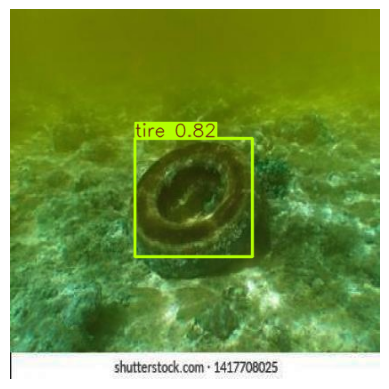


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-1027_jpg.rf.02ecab6b0f743695a65fb44e935e8f17.jpg: 640x640 (no detections), 16.4ms
Speed: 3.8ms preprocess, 16.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


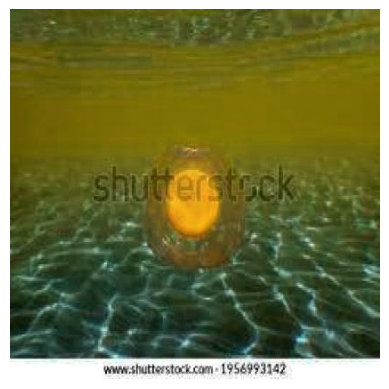


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-1253__flipv_jpg.rf.804e63be1099335f2eb8b6ff18417f73.jpg: 640x640 3 tires, 18.8ms
Speed: 6.1ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


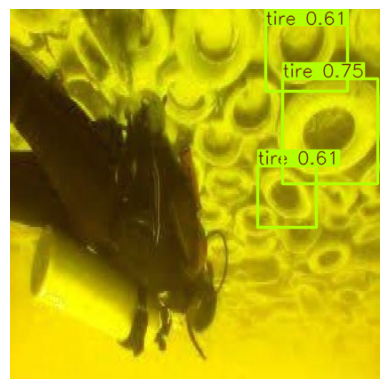


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-378_jpg.rf.6205ccc20bef55735b88368d125df060.jpg: 640x640 (no detections), 24.8ms
Speed: 12.8ms preprocess, 24.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


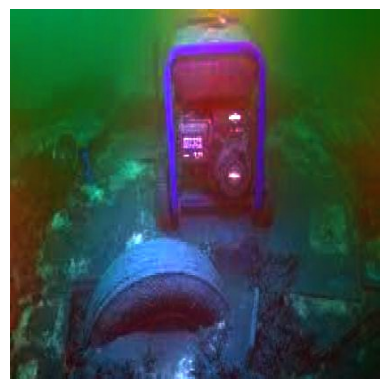


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-205_jpg.rf.7e01caaa72a78b96315f148060a7ad1d.jpg: 640x640 1 net, 17.4ms
Speed: 8.5ms preprocess, 17.4ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)


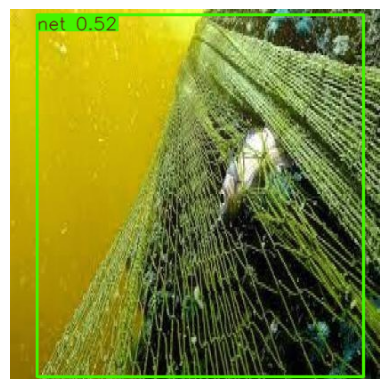


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/gloves_in_the_ocean76_jpg.rf.62ef828a2591762df20ffc3ab4f12854.jpg: 640x640 (no detections), 16.5ms
Speed: 4.1ms preprocess, 16.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


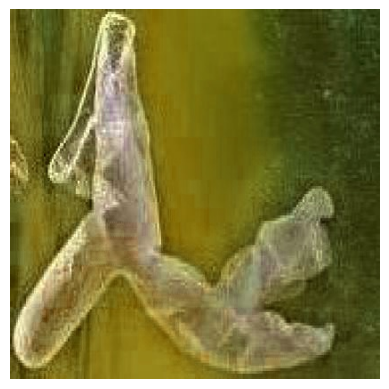


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-241__flipv_jpg.rf.65df6acb6cd6f89c49c9d079c711cc60.jpg: 640x640 (no detections), 18.5ms
Speed: 3.9ms preprocess, 18.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


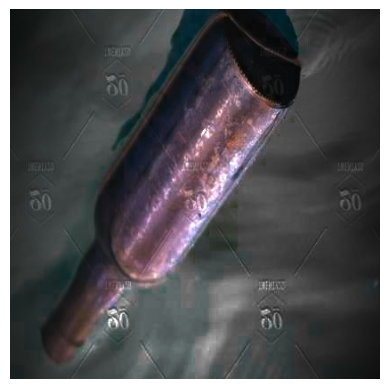


image 1/1 /content/drive/MyDrive/Datasets /underwater_plastics/test/images/uwg_g-180__flipv_jpeg_jpg.rf.f9fe636b073e4f02c84cd6bf1d77b3a5.jpg: 640x640 (no detections), 16.5ms
Speed: 8.2ms preprocess, 16.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


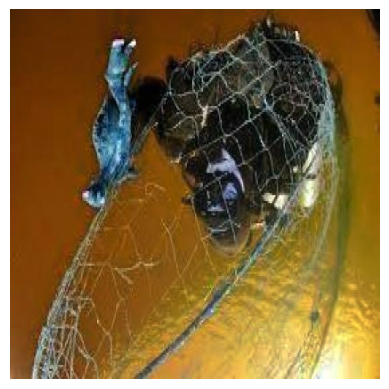

In [ ]:
# Load the best-trained model
trained_model = YOLO('/content/runs/detect/underwater_yolov8/weights/best.pt')

# Predict on test images
test_images = os.listdir(os.path.join(dataset_path, 'test/images'))
for img_name in test_images[:20]:  # Predict on first 5 test images
    img_path = os.path.join(dataset_path, 'test/images', img_name)
    results = trained_model.predict(source=img_path, save=False, conf=0.5)

    # Visualize predictions
    for result in results:
        plt.imshow(result.plot())
        plt.axis('off')
        plt.show()


In [ ]:
# Fine-tune the model
model.train(
    data=f'{dataset_path}/data.yaml',
    epochs=10,          # Increase epochs
    imgsz=640,           # Image size
    batch=32,            # Larger batch size
    lr0=0.001,           # Adjust learning rate
    name='underwater_yolov8_finetune'
)


Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Datasets /underwater_plastics/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=underwater_yolov8_finetune, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning /content/drive/MyDrive/Datasets /underwater_plastics/train/labels.cache... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Datasets /underwater_plastics/valid/labels.cache... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]


Plotting labels to runs/detect/underwater_yolov8_finetune/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/underwater_yolov8_finetune
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.51G      1.777       2.64      2.446         26        640: 100%|██████████| 114/114 [01:44<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.01s/it]

                   all       1001       1891      0.577      0.174      0.162     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.55G      1.801      2.627      2.445         17        640: 100%|██████████| 114/114 [01:37<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all       1001       1891      0.582      0.153      0.163     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.47G      1.794      2.579      2.435         15        640: 100%|██████████| 114/114 [01:37<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]


                   all       1001       1891      0.604       0.18       0.15     0.0816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.52G       1.77      2.502      2.411         19        640: 100%|██████████| 114/114 [01:36<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]


                   all       1001       1891       0.68      0.161      0.171     0.0928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.87G      1.712      2.388      2.348         27        640: 100%|██████████| 114/114 [01:34<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.03it/s]


                   all       1001       1891       0.64      0.202      0.213      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.82G      1.684      2.275      2.309         22        640: 100%|██████████| 114/114 [01:34<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.01s/it]

                   all       1001       1891      0.649      0.243      0.246      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.51G       1.65      2.177      2.281         17        640: 100%|██████████| 114/114 [01:34<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.10s/it]

                   all       1001       1891      0.654      0.241      0.266      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.72G      1.618      2.079      2.245         35        640: 100%|██████████| 114/114 [01:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.07s/it]

                   all       1001       1891       0.68      0.243      0.275      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.73G      1.586      2.019      2.217         32        640: 100%|██████████| 114/114 [01:35<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.09s/it]

                   all       1001       1891       0.63      0.271      0.292      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.87G      1.552      1.941      2.174         24        640: 100%|██████████| 114/114 [01:35<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.07s/it]

                   all       1001       1891      0.704       0.25      0.301      0.175



10 epochs completed in 0.323 hours.
Optimizer stripped from runs/detect/underwater_yolov8_finetune/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/underwater_yolov8_finetune/weights/best.pt, 22.5MB

Validating runs/detect/underwater_yolov8_finetune/weights/best.pt...
Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19<00:00,  1.22s/it]


                   all       1001       1891      0.704       0.25      0.301      0.175
                  Mask         77         90     0.0371     0.0111     0.0675     0.0314
                   can         18         20          1          0     0.0535     0.0274
             cellphone         61         71      0.709      0.856      0.901      0.653
           electronics         27         40       0.54      0.425      0.416      0.165
               gbottle         36         82      0.265      0.354      0.282      0.151
                 glove         37         55      0.544        0.2      0.262      0.166
                 metal         10         22          1          0    0.00503    0.00252
                  misc         48         51          1     0.0321      0.132      0.087
                   net        146        148      0.615      0.518      0.576      0.317
                  pbag        290        330      0.631      0.776      0.763      0.565
               pbottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed58a985990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [ ]:
from ultralytics import YOLO

# Update this with the actual path to your trained model
# For example:
model_path = '/content/runs/detect/underwater_yolov8/weights/best.pt'

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Validate the model on your dataset
results = model.val(data='/content/drive/MyDrive/Datasets /underwater_plastics/data.yaml')  # Path to the dataset configuration file

Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/Datasets /underwater_plastics/valid/labels.cache... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.54it/s]


                   all       1001       1891      0.568      0.139      0.141     0.0809
                  Mask         77         90          0          0     0.0161    0.00699
                   can         18         20          1          0     0.0131    0.00497
             cellphone         61         71       0.47      0.634      0.565      0.354
           electronics         27         40          1          0     0.0111    0.00696
               gbottle         36         82      0.366       0.11      0.123      0.042
                 glove         37         55          0          0     0.0276     0.0128
                 metal         10         22          1          0          0          0
                  misc         48         51          1          0     0.0151    0.00635
                   net        146        148      0.392      0.419       0.36      0.185
                  pbag        290        330      0.611       0.67      0.664      0.464
               pbottl

In [ ]:
import os

# Check the current working directory
cwd = os.getcwd()
print(f"Current Working Directory: {cwd}")


Current Working Directory: /content


In [ ]:
train_path = os.path.join(cwd, 'runs/detect/underwater_yolov8')
print(f"Training Output Path: {train_path}")


Training Output Path: /content/runs/detect/underwater_yolov8


In [ ]:
val_path = os.path.join(cwd, 'runs/val/')
print(f"Validation Output Path: {val_path}")


Validation Output Path: /content/runs/val/


In [ ]:
# Training path
train_path = 'runs/detect/underwater_yolov8'

# Validation plots
pr_curve = os.path.join(train_path, 'PR_curve.png')
conf_matrix = os.path.join(train_path, 'confusion_matrix.png')

# Display paths
print(f"Precision-Recall Curve Path: {pr_curve}")
print(f"Confusion Matrix Path: {conf_matrix}")


Precision-Recall Curve Path: runs/detect/underwater_yolov8/PR_curve.png
Confusion Matrix Path: runs/detect/underwater_yolov8/confusion_matrix.png
